In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f 

In [3]:
'''
Steps: 
1. Construct GAMs
2 Train GAMs on train data
3. Test GAMs on test data, adjust parameters
4. Partial Dependence Plots
5. Variable Importance 
'''

'\nSteps: \n1. Construct GAMs\n2 Train GAMs on train data\n3. Test GAMs on test data, adjust parameters\n4. Partial Dependence Plots\n5. Variable Importance \n'

In [8]:
BASEPATH = 'C:\SuryaMain\Python Projects\Chinook-Growth-Project'
SIMULATION_BASEPATH = os.path.join(BASEPATH, "simulate_nonlinear_data")

In [9]:
os.path.exists(SIMULATION_BASEPATH)

True

In [21]:
data_set_1 = os.path.join(SIMULATION_BASEPATH, "data_set_1")
X_1 = pd.read_csv(os.path.join(data_set_1, "X.csv"))
X_1.drop(X_1.columns[0], axis=1, inplace=True)
y_1 = pd.read_csv(os.path.join(data_set_1, "y.csv"))
y_1.drop(y_1.columns[0], axis=1, inplace=True)

In [23]:
gam_1 = LinearGAM(n_splines = 25).fit(X_1, y_1)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<Figure size 432x288 with 0 Axes>

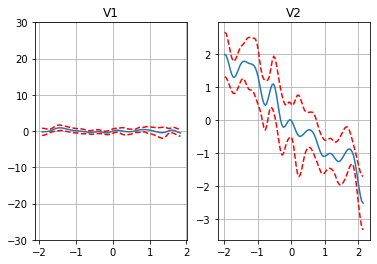

In [27]:
##PARTIAL DEPENDENCE PLOTS FOR EACH VARIABLE

gam_1.gridsearch(X_1, y_1)
## plotting
plt.figure();
fig, axs = plt.subplots(1,2);

titles = ["V1", "V2"]
for i, ax in enumerate(axs):
    XX = gam_1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);
    ax.grid()